In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.tree import DecisionTreeClassifier

import utils 

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.utils import check_X_y

def decision_tree_cross_validation_accuracies(X, y, n_folds, lambdas):
    X, y = check_X_y(X, y)
    # Création d'un object `KFold` pour la validation croisée
    kf = KFold(n_splits=n_folds, shuffle=True).split(X)
    for train_index, val_index in kf:
        # Création de `X_train`, `y_train`, `X_val` et `y_val`
        X_train = X[train_index, :]
        y_train = y[train_index]
        X_val = X[val_index, :]
        y_val = y[val_index]
    
    for k, lmb in enumerate(lambdas):
        # Création d'un arbre avec un coefficient coût-complexité
        # égal à `lmb`
        clf = DecisionTreeClassifier(ccp_alpha=lmb)
        # Apprentissage sur l'ensemble d'apprentissage et calcul
        # de la précision sur l'ensemble de validation
        clf.fit(X_train, y_train)
        pred = clf.predict(X_val)
        acc = accuracy_score(y_val, pred)
        yield k, acc

In [5]:
x = pd.read_csv("../Data_Crowdsourced_Mapping/training.csv",sep=",")
X_train = x.drop(columns=["class"])
y_train = x["class"]
x = pd.read_csv("../Data_Crowdsourced_Mapping/testing.csv",sep=",")
X_test = x.drop(columns=["class"])
y_test = x["class"]

In [9]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
lambdas = clf.cost_complexity_pruning_path(X, y)["ccp_alphas"]
lambdas = np.unique(lambdas)
lambdas_moy = np.sqrt(lambdas[:-1] * lambdas[1:])

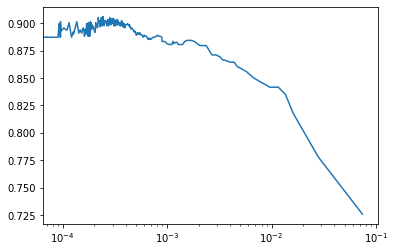

In [14]:
n_folds = 10
df = pd.DataFrame(
decision_tree_cross_validation_accuracies(X, y, n_folds,lambdas_moy),columns=["k", "accuracy"])
valid = df.groupby("k").mean()
plt.plot(lambdas_moy[valid.index], valid.accuracy)
plt.xscale('log')
plt.show()

In [16]:
lmb = lambdas_moy[valid.accuracy.idxmax()]
print(lmb)
clf = DecisionTreeClassifier(ccp_alpha=lmb)
clf.fit(X, y)
clf.score(X_test,y_test)

0.00024187260132738005


0.5666666666666667